# ⚠️ **Disclaimer**

*This is a simplified example provided solely for educational purposes. The analysis has not been optimized—for instance, missing values have not been addressed, and meaningful preprocessing steps have been omitted. As such, this should be viewed as a basic, incomplete, and potentially inaccurate illustration of the procurement process.*  

---

# Simple network analysis of top winners and their items

In the following cell, we'll create a network visualization that shows the relationships between the top 10 winning participants and their most frequently won items. 
The visualization will:

1. Create a graph using NetworkX
2. Represent winners and items as different types of nodes
3. Connect winners to items they can supply and have won

This network analysis will help us understand:
- Which participants tend to win which types of items
- Potential patterns in procurement outcomes
- The diversity of items won by top participants

The resulting visualization will show winners in light blue and items in a different color, with edges representing winning relationships.

---

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df_participants = pd.read_csv('../procurement_auction_data/Participantes.csv', encoding='cp1252', sep=';')
df_participants.head()

/var/folders/ph/58c8ymvn44b20qwv_6w1170w0000gn/T/ipykernel_49707/2697601328.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_participants = pd.read_csv('../procurement_auction_data/Participantes.csv', encoding='cp1252', sep=';')


,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Código Órgão,Nome Órgão,Código Item Compra,Descrição Item Compra,Código Participante,Nome Participante,Flag Vencedor
0,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,25000,Ministério da Fazenda - Unidades com víncul,1701200500001201200001,"INSTALACAO / MANUTENCAO - ELEVADORES, ESCADAS ...",05379701000105,EGS ELEVADORES LTDA,SIM
1,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200001,PRÓTESE MODULAR DESARTICULAÇÃO JOELHO.,03233236000166,ROSEMBERG CARRIEL VIANA,NÃO
2,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200001,PRÓTESE MODULAR DESARTICULAÇÃO JOELHO.,87013710000134,ORTOCOM ORTOPEDIA E COM DE APARELHOS ORTOPEDIC...,NÃO
3,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200001,PRÓTESE MODULAR DESARTICULAÇÃO JOELHO.,08198611000106,ETHNOS INDUSTRIA E COMERCIO DE PRODUTOS ORTOPE...,NÃO
4,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200001,PRÓTESE MODULAR DESARTICULAÇÃO JOELHO.,07616390000178,WARKEN & CIA LTDA,NÃO


# Winners Analysis
In the following cells, we'll analyze the winners of the procurement auctions. We will:

1. Filter for winning bids (`Flag Vencedor == 'SIM'`)
2. Group by participant name to count their wins
3. Sort participants by number of wins in descending order
4. Display the top 10 most successful participants

This analysis will help us identify the "most successful" participants in the procurement process.

In [3]:
# Count winners by participant
winners = df_participants[df_participants['Flag Vencedor'] == 'SIM'].groupby('Nome Participante').size()
# print(winners)

# Sort by number of wins in descending order
winners_sorted = winners.sort_values(ascending=False)
# print(winners_sorted)

# Display top 10 winners
# print("Top 10 participants by number of wins:")
# print(winners_sorted.head(10))


# Network Analysis of Top Winners and Their Items

In the next cells, we create a network visualization showing the relationship between the top 10 winning participants and their most frequently "supplied/(won)" items. The visualization will:

1. Create a graph using NetworkX
2. Represent winners and items as different types of nodes
3. Connect winners to items they can supply and have successfully partake and won the auction

An improved version of this network analysis can help us understand:
- Which participants tend to win which types of items
- Potential patterns in procurement outcomes
- The diversity of items won by top participants

The resulting visualization will show winners in light blue and items in a different color, with edges representing winning relationships.

In [4]:
# Get the top 10 winners from previous analysis
top_10_winners = winners_sorted.head(10).index
# print(top_10_winners)

# Filter the original dataframe for these winners
top_winners_data = df_participants[df_participants['Nome Participante'].isin(top_10_winners)]
# print(top_winners_data)

# Get top 10 most common items
item_counts = top_winners_data[top_winners_data['Flag Vencedor'] == 'SIM']['Descrição Item Compra'].value_counts()
top_10_items = item_counts.head(10).index
# print(top_10_items)

# Create mappings for both items and winners
item_mapping = {item: f"Good/Service {chr(65 + i)}" for i, item in enumerate(top_10_items)}
winner_mapping = {winner: f"Supplier_{i+1}" for i, winner in enumerate(top_10_winners)}
# print(item_mapping)
# print(winner_mapping)

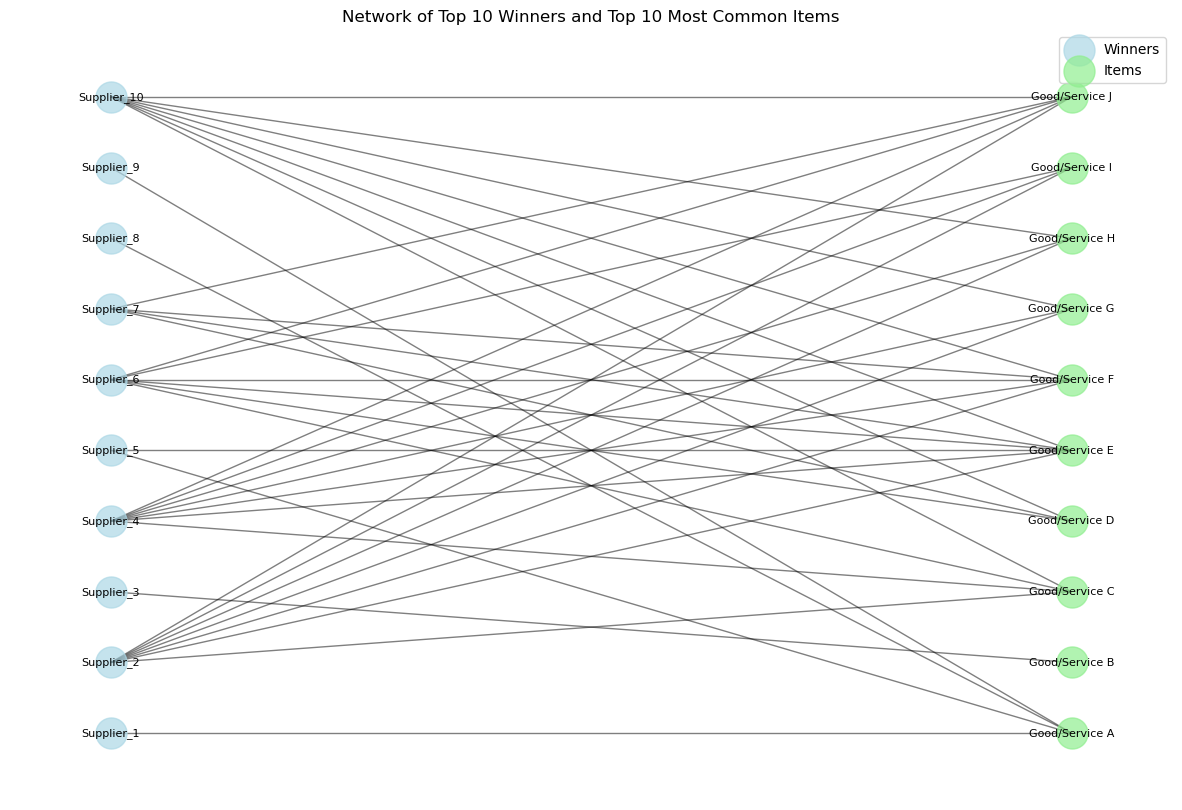

In [5]:
# Create a new graph
G = nx.Graph()

# Add nodes for winners and items
for winner in top_10_winners:
    G.add_node(winner_mapping[winner], bipartite=0)  # 0 for winners

# Add nodes for top 10 items with encoded names
for item in top_10_items:
    G.add_node(item_mapping[item], bipartite=1)  # 1 for items

# Add edges between winners and items they won
for _, row in top_winners_data[top_winners_data['Flag Vencedor'] == 'SIM'].iterrows():
    if row['Descrição Item Compra'] in top_10_items:
        G.add_edge(winner_mapping[row['Nome Participante']], item_mapping[row['Descrição Item Compra']])

# Create the plot (enhance sizing)
plt.figure(figsize=(15, 10))

# Create custom layout: winners on the left, items on the right
pos = {}
winners = [n for n in G.nodes() if G.nodes[n]['bipartite']==0]
items = [n for n in G.nodes() if G.nodes[n]['bipartite']==1]

# Position winners on the left side (x=-1)
for i, winner in enumerate(winners):
    pos[winner] = (-1, i - len(winners)/2)

# Position items on the right side (x=1)
for i, item in enumerate(items):
    pos[item] = (1, i - len(items)/2)

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                      nodelist=winners,
                      node_color='lightblue',
                      node_size=500,
                      alpha=0.7,
                      label='Winners')
nx.draw_networkx_nodes(G, pos,
                      nodelist=items,
                      node_color='lightgreen',
                      node_size=500,
                      alpha=0.7,
                      label='Items')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Network of Top 10 Winners and Top 10 Most Common Items')
plt.legend()
plt.axis('off')
plt.show()

In [6]:
# Print some network analytics
print("\nNetwork Analytics:")
print(f"Number of winners: {len([n for n in G.nodes() if G.nodes[n]['bipartite']==0])}")
print(f"Number of items: {len([n for n in G.nodes() if G.nodes[n]['bipartite']==1])}")
print(f"Number of connections: {G.number_of_edges()}")

# Print the mappings for reference
print("\nWinner Mapping:")
for winner, code in winner_mapping.items():
    print(f"{code}: {winner}")

print("\nItem Mapping:")
for item, code in item_mapping.items():
    print(f"{code}: {item}")


Network Analytics:
Number of winners: 10
Number of items: 10
Number of connections: 37

Winner Mapping:
Supplier_1: LIBRE DISTRIBUIDORA LTDA
Supplier_2: CALIBRY METROLOGIA COMERCIO E CALIBRACAO LTDA
Supplier_3: Sigiloso
Supplier_4: QUALIVIDROS DISTRIBUIDORA LTDA
Supplier_5: CKS COMERCIO DE MATERIAIS DE ESCRITORIO LTDA
Supplier_6: SIGMA-ALDRICH BRASIL LTDA
Supplier_7: L H GONCALVES COMPONENTES ELETRONICOS LTDA
Supplier_8: LIVRARIA GP LTDA
Supplier_9: CORUJET EDITORA IMPORTACAO E EXPORTACAO LTDA
Supplier_10: QUALY COMERCIAL LTDA

Item Mapping:
Good/Service A: 'LIVRO'
Good/Service B: Informação protegida por sigilo nos termos da legislação vigente
Good/Service C: LABORATORIO DIDATICO MOVEL
Good/Service D: ACESSÓRIO/COMPONENTE ELÉTRICO ELETRÔNICO
Good/Service E: ACESSÓRIOS PARA ESTUDO/TREINAMENTO
Good/Service F: MEDIDOR LABORATÓRIO
Good/Service G: UTENSILIO DE VIDRO
Good/Service H: BÉQUER
Good/Service I: REAGENTE PARA TINTA
Good/Service J: SOLVENTE
